In [1]:
from injector_surrogate_quads import *

In [2]:
import sklearn

In [3]:
sklearn.__version__

'0.23.2'

<a id="init"></a>
# Initial Info - SHOULD WORK WITHOUT ANY OF THIS

### Loading basic model info
todo - put into config file

In [4]:
#load model info
model_info = json.load(open('./model_info.json'))

#inputs and outputs model is  trained on
model_in_list = model_info['model_in_list']
model_out_list = model_info['model_out_list']

#dictionary of location of variables in array
loc_in = model_info['loc_in']
loc_out = model_info['loc_out']

#inputs and outputs model is  trained on
input_mins = model_info['train_input_mins']
input_maxs = model_info['train_input_maxs']

### Conversion between sim and machine

Explanation on model inputs and how they relate to PVs:
https://github.com/slaclab/lcls-cu-inj-surrogate/blob/master/pv_mapping/cu_inj_impact.csv

In [5]:
pv_info = json.load(open('./pvinfo.json'))

In [6]:
pv_info.keys()

dict_keys(['pv_to_sim_factor', 'pv_unit', 'pv_name_to_sim_name', 'sim_name_to_pv_name', 'sim_to_pv_factor'])

In [7]:
pv_to_sim_factor = pv_info['pv_to_sim_factor']
sim_to_pv_factor = pv_info['sim_to_pv_factor']
pv_unit = pv_info['pv_unit']
pv_name_to_sim_name = pv_info['pv_name_to_sim_name']
sim_name_to_pv_name = pv_info['sim_name_to_pv_name']

In [8]:
model_in_list

['distgen:r_dist:sigma_xy:value',
 'distgen:t_dist:length:value',
 'distgen:total_charge:value',
 'SOL1:solenoid_field_scale',
 'CQ01:b1_gradient',
 'SQ01:b1_gradient',
 'L0A_scale:voltage',
 'L0A_phase:dtheta0_deg',
 'L0B_scale:voltage',
 'L0B_phase:dtheta0_deg',
 'QA01:b1_gradient',
 'QA02:b1_gradient',
 'QE01:b1_gradient',
 'QE02:b1_gradient',
 'QE03:b1_gradient',
 'QE04:b1_gradient']

In [9]:
sim_name_to_pv_name 

{'distgen:r_dist:sigma_xy:value': 'IRIS:LR20:130:CONFG_SEL',
 'SOL1:solenoid_field_scale': 'SOLN:IN20:121:BDES',
 'CQ01:b1_gradient': 'QUAD:IN20:121:BDES',
 'SQ01:b1_gradient': 'QUAD:IN20:122:BDES',
 'L0A_phase:dtheta0_deg': 'ACCL:IN20:300:L0A_PDES',
 'L0B_phase:dtheta0_deg': 'ACCL:IN20:400:L0B_PDES',
 'L0A_scale:voltage': 'ACCL:IN20:300:L0A_ADES',
 'L0B_scale:voltage': 'ACCL:IN20:400:L0B_ADES',
 'QA01:b1_gradient': 'QUAD:IN20:361:BDES',
 'QA02:b1_gradient': 'QUAD:IN20:371:BDES',
 'QE01:b1_gradient': 'QUAD:IN20:425:BDES',
 'QE02:b1_gradient': 'QUAD:IN20:441:BDES',
 'QE03:b1_gradient': 'QUAD:IN20:511:BDES',
 'QE04:b1_gradient': 'QUAD:IN20:525:BDES',
 'distgen:t_dist:length:value': 'Pulse_length',
 'distgen:total_charge:value': 'Charge'}

# Load Model

In [10]:
Model = Surrogate_NN()

Model.load_saved_model()
Model.load_scaling()

In [11]:
!pwd

/gpfs/slac/staas/fs1/g/accelerator_modeling/edelen/LCLS_CU_full/training/OTR2/with_quads


### Example: Predict sim units

In [12]:
#sim units
X_true = np.load('x_raw_small.npy',allow_pickle=True)
Y_true = np.load('y_raw_small.npy',allow_pickle=True)

In [15]:
Model.take_log_out = False

In [16]:
# maketake_log_outdictions in sim units
Y_pred = Model.pred_sim_units(X_true)

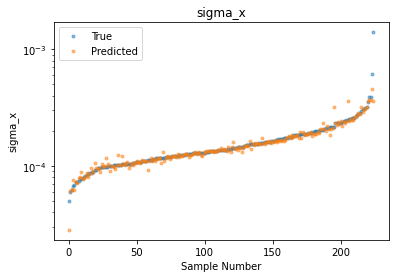

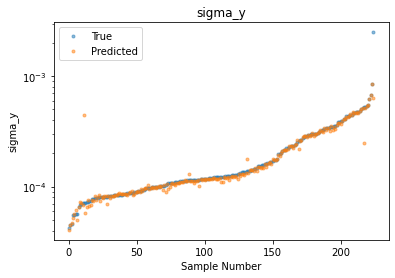

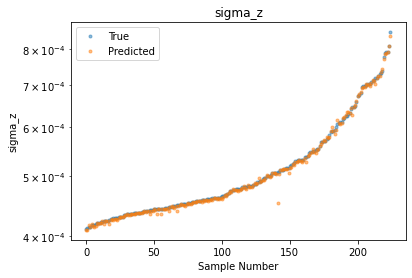

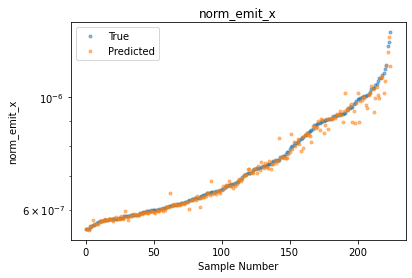

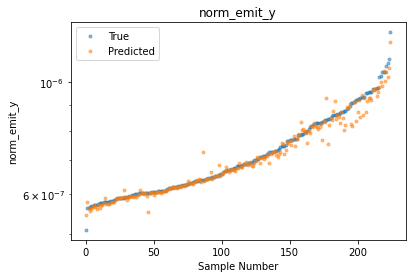

In [17]:
 for i in range(0,Y_true.shape[1]):
    idx=np.argsort(Y_true[:,i])
    plt.plot(Y_true[idx,i],'.',alpha=0.5)
    plt.plot(Y_pred[idx,i],'.',alpha=0.5)
    plt.yscale('log')
    plt.title(Model.model_out_list[i])
    plt.ylabel(Model.model_out_list[i])
    plt.xlabel('Sample Number')
    plt.legend(['True','Predicted'])
    plt.show()

### Example: Predict machine units

In [18]:
#Get some machine unit values by converting sim data
X_true_pv = Model.sim_to_machine(np.asarray(X_true))

In [19]:
Y_pred_pv = Model.pred_machine_units(X_true_pv);

In [20]:
Y_pred_sim = Model.pred_sim_units(X_true);

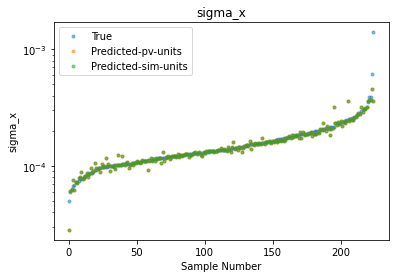

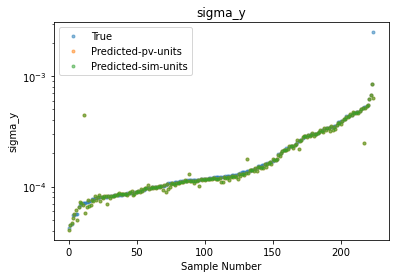

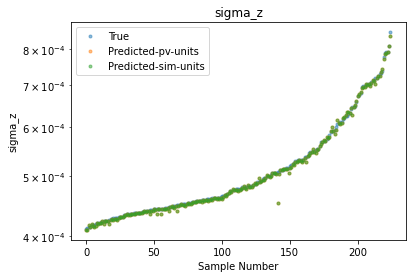

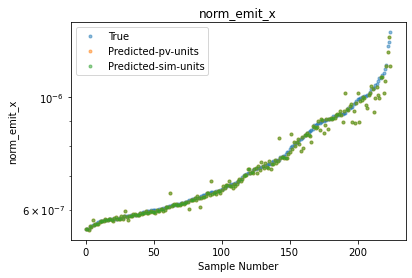

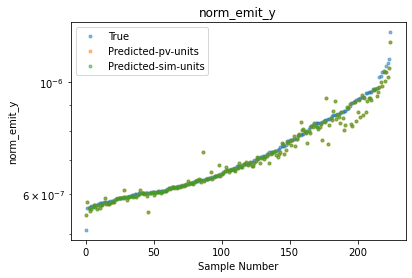

In [21]:
 for i in range(0,Y_true.shape[1]):
    idx=np.argsort(Y_true[:,i])
    plt.plot(Y_true[idx,i],'.',alpha=0.5)
    plt.plot(Y_pred_pv[idx,i],'.',alpha=0.5)
    plt.plot(Y_pred_sim[idx,i],'.',alpha=0.5)
    plt.yscale('log')
    plt.title(Model.model_out_list[i])
    plt.ylabel(Model.model_out_list[i])
    plt.xlabel('Sample Number')
    plt.legend(['True','Predicted-pv-units','Predicted-sim-units'])
    plt.show()

# SCAN OF Q525

<a id="BO"></a>
# Small BO Run

In [22]:
#ref point from sim
ref_point = [[4.23867825e-01,
                      3.06083484e+00,
                      2.50000000e+02,
                      2.45806452e-01,
                      7.13917676e-04,
                      3.27285211e-04,
                      5.80000000e+07,
                      -9.53597349e+00,
                      7.00000000e+07,
                        9.85566222e+00,
                          1.85240001e+00,
                      -1.85240001e+00,
                        1.87200002e-01,
                        1.66100000e-01,
                      -2.64090000e+00,
                        2.97999999e+00]]




#convert to machine units
ref_point = Model.sim_to_machine(np.asarray(ref_point))

#nested_list
ref_point=[ref_point[0]]


opt_var_names = ['SOL1:solenoid_field_scale','SQ01:b1_gradient','CQ01:b1_gradient']
opt_out_names = ['norm_emit_x','norm_emit_y']

def evaluate(varx,vary,varz):

    #make input array of length model_in_list
    x_in = np.empty((1,len(Model.model_in_list)))

    #fill in reference point around whicch to optimize
    x_in[:,:] = np.asarray(ref_point)

    #set solenoid, SQ, CQ to values from optimization step
    x_in[:, Model.loc_in[opt_var_names[0]]] = varx
    x_in[:, Model.loc_in[opt_var_names[1]]] = vary
    x_in[:, Model.loc_in[opt_var_names[2]]] = varz

    y_out = Model.pred_machine_units(x_in) 
    print(y_out)

    return -1*objective(y_out)[0]


def objective(y_out):
    out1 = y_out[:,Model.loc_out['norm_emit_x']] #grab norm_emit_x out of the model
    out2 = y_out[:,Model.loc_out['norm_emit_y']] #grab norm_emit_y out of the model
    
    return np.sqrt(out1*out2)

In [23]:


opt_var_names = ['SOL1:solenoid_field_scale','SQ01:b1_gradient','CQ01:b1_gradient']
opt_out_names = ['norm_emit_x','norm_emit_y']

def evaluate(varx,vary,varz):

    #make input array of length model_in_list
    x_in = np.empty((1,len(Model.model_in_list)))

    #fill in reference point around whicch to optimize
    x_in[:,:] = np.asarray(ref_point)

    #set solenoid, SQ, CQ to values from optimization step
    x_in[:, Model.loc_in[opt_var_names[0]]] = varx
    x_in[:, Model.loc_in[opt_var_names[1]]] = vary
    x_in[:, Model.loc_in[opt_var_names[2]]] = varz

    y_out = Model.pred_machine_units(x_in) 
    print(y_out)

    return -1*objective(y_out)[0]


def objective(y_out):
    out1 = y_out[:,Model.loc_out['norm_emit_x']] #grab norm_emit_x out of the model
    out2 = y_out[:,Model.loc_out['norm_emit_y']] #grab norm_emit_y out of the model
    
    return np.sqrt(out1*out2)


In [24]:
from bayes_opt import BayesianOptimization

pbounds = {'varx': (0.44, 0.55),
           'vary': (-0.02, 0.02),
           'varz': (-0.02, 0.02)}

optimizer = BayesianOptimization(
    f = evaluate,
    pbounds = pbounds,
    random_state = 1,
)

optimizer.maximize(
    init_points=10,
    n_iter=40,
)

|   iter    |  target   |   varx    |   vary    |   varz    |
-------------------------------------------------------------
[[2.7467601e-04 1.4553819e-04 4.7393533e-04 1.0180469e-06 1.2057761e-06]]
|  1        | -1.108e-0 |  0.4859   |  0.008813 | -0.02     |
[[1.1349894e-04 2.3533207e-04 4.6644569e-04 9.6800841e-07 1.1606699e-06]]
|  2        | -1.06e-06 |  0.4733   | -0.01413  | -0.01631  |
[[2.3886983e-04 5.1999436e-04 4.5292501e-04 9.4200624e-07 1.0436681e-06]]
|  3        | -9.915e-0 |  0.4605   | -0.006178 | -0.004129 |
[[6.4498716e-04 9.5299416e-05 4.5938729e-04 1.8490148e-06 1.2554377e-06]]
|  4        | -1.524e-0 |  0.4993   | -0.003232 |  0.007409 |
[[3.0077327e-04 4.5837442e-04 4.5170498e-04 8.1395632e-07 1.1358223e-06]]
|  5        | -9.615e-0 |  0.4625   |  0.01512  | -0.0189   |
[[9.5576211e-04 1.4373640e-04 4.5640609e-04 2.9475946e-06 2.0898590e-06]]
|  6        | -2.482e-0 |  0.5138   | -0.003308 |  0.002348 |
[[2.8372247e-04 6.3681509e-04 4.5312452e-04 1.1194409e-06 9.

In [25]:
SOL_opt = optimizer.max['params']['varx']
CQ_opt = optimizer.max['params']['vary']
SQ_opt = optimizer.max['params']['varz']
print('optimum (pv_units) ',SOL_opt, CQ_opt, SQ_opt)

opt_emit = -1*optimizer.max['target']
print('optimum geom emit ', opt_emit)

optimum (pv_units)  0.47737014691426854 -0.0004981337721706551 0.0004994750148957644
optimum geom emit  5.716697728530562e-07
